## **Extracción, Transformación y Carga de los dats**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

"age": edad (numérica)

"job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")

"marital": estado civil (categórica: "married", "divorced", "single")

"education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")

"default": si dejó de pagar sus obligaciones (categórica: "yes", "no")

"balance": saldo promedio anual en euros (numérica)

"housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")

"loan": ¿tiene créditos de consumo? (categórica: "yes", "no")

"contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")

"day": último día del mes en el que fue contactada (numérica)

"month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")

"duration": duración (en segundos) del último contacto (numérica)

"campaign": número total de veces que fue contactada durante la campaña (numérica)

"pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)

"previous": número de veces que ha sido contactada antes de esta campaña (numérica)

"poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")

"y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [2]:
df = pd.read_csv('dataset_banco.csv', sep=',', encoding='UTF-8', decimal='.', thousands=',')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
print(df.shape)

(45215, 17)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Realicemos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas 

2. Columnas irrelevantes (que no corresponden al problema que queremos resolver)

3. Registros (filas) repetidos

4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamnete la solución es eliminarlos.

5. Errores tipográficos en el caso de las variables categóricas.


### **Datos Faltantes**

In [5]:
# Valores faltantes por columna
df.isna().sum(axis=0)

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Eliminamos las filas
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [7]:
# Valores faltantes por columna
df.isna().sum(axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### **Columnas Irrelevantes**
Una columna irrelevante puede ser

* Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el perfil del cliente (deporte, hobbies, comida favorita, etc)

* Una columna categorica de un solo nivel. Por ejemplo si en la columna "job" solo tuvieramos el nivel "unknown".

* Una columna numerica pero con un solo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.

* Columnas con información redundante. Por ejemplo si además de la columna "month" y "day" tuviesemos la columna "month-day".

In [8]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

In [9]:
for col in cols_cat:
    print(f"Columna {col}:{df[col].nunique()} subniveles ")

Columna job:18 subniveles 
Columna marital:6 subniveles 
Columna education:10 subniveles 
Columna default:2 subniveles 
Columna housing:2 subniveles 
Columna loan:6 subniveles 
Columna contact:5 subniveles 
Columna month:12 subniveles 
Columna poutcome:6 subniveles 
Columna y:2 subniveles 


Todas las columnas categoricas tienen más de un subnivel. No eliminaremos ninguna

Verifiquemos que ocurre con las columnas numéricas

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estandar diferente de 0, lo que indica que no tienen un único valor, asi que oreservaremos todas las columnas

### **Columnas repetidas**

In [11]:
print(f"Tamaño del set antes de de eliminar las filas repetidas: {df.shape }")
df.drop_duplicates(inplace=True)
print(f"Tamaño del set despues de de eliminar las filas repetidas: {df.shape }")

Tamaño del set antes de de eliminar las filas repetidas: (45207, 17)
Tamaño del set despues de de eliminar las filas repetidas: (45203, 17)


### **Outliers en variables numéricas**

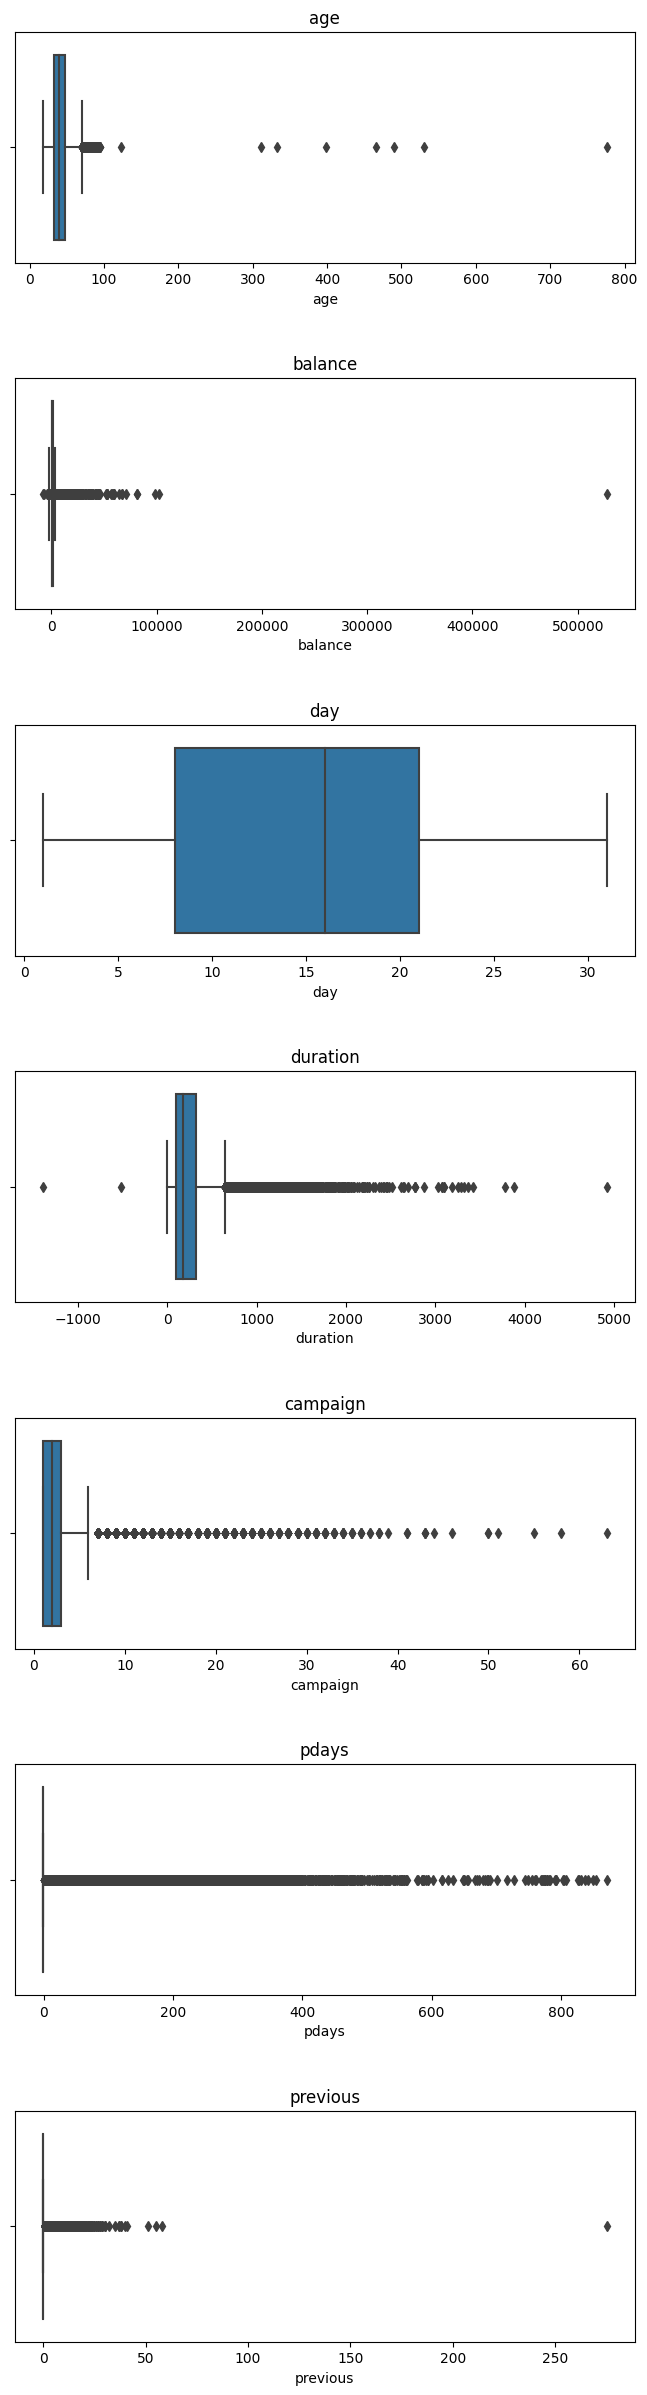

In [12]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes

cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

### **Observaciones**
* 'age' hay sujetos con edades mayores a 100 años

* 'duration': hay valores negativos

* 'previous': hay un valor extremadamente alto (cecarno a 300)

In [13]:
# Eliminar filas con age mayor que 100
print(f"Tamaño del set antes de eliminar registros de edad: {df.shape}")
df = df[df['age']<=100]
print(f"Tamaño del set después de eliminar registros de edad: {df.shape}")

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [14]:
# Eliminar las filas con 'duration'<0
print(f"Tamaño del set antes de eliminar registros de duración: {df.shape}")
df = df[df['duration']>0]
print(f"Tamaño del set después de eliminar registros de duración: {df.shape}")

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


In [15]:
# Eliminar las filas con 'previous'< 100
print(f"Tamaño del set antes de eliminar registros de previous: {df.shape}")
df = df[df['previous'] <= 100]
print(f"Tamaño del set después de eliminar registros de previous: {df.shape}")

Tamaño del set antes de eliminar registros de previous: (45190, 17)
Tamaño del set después de eliminar registros de previous: (45189, 17)


### **Errores tipografico en variables categóricas**
Pueden aparecer subniveles como "unkown" o "UKN" que para nosotros son equivalentes pero para el programa son diferentes

e debe unificar estos niveles

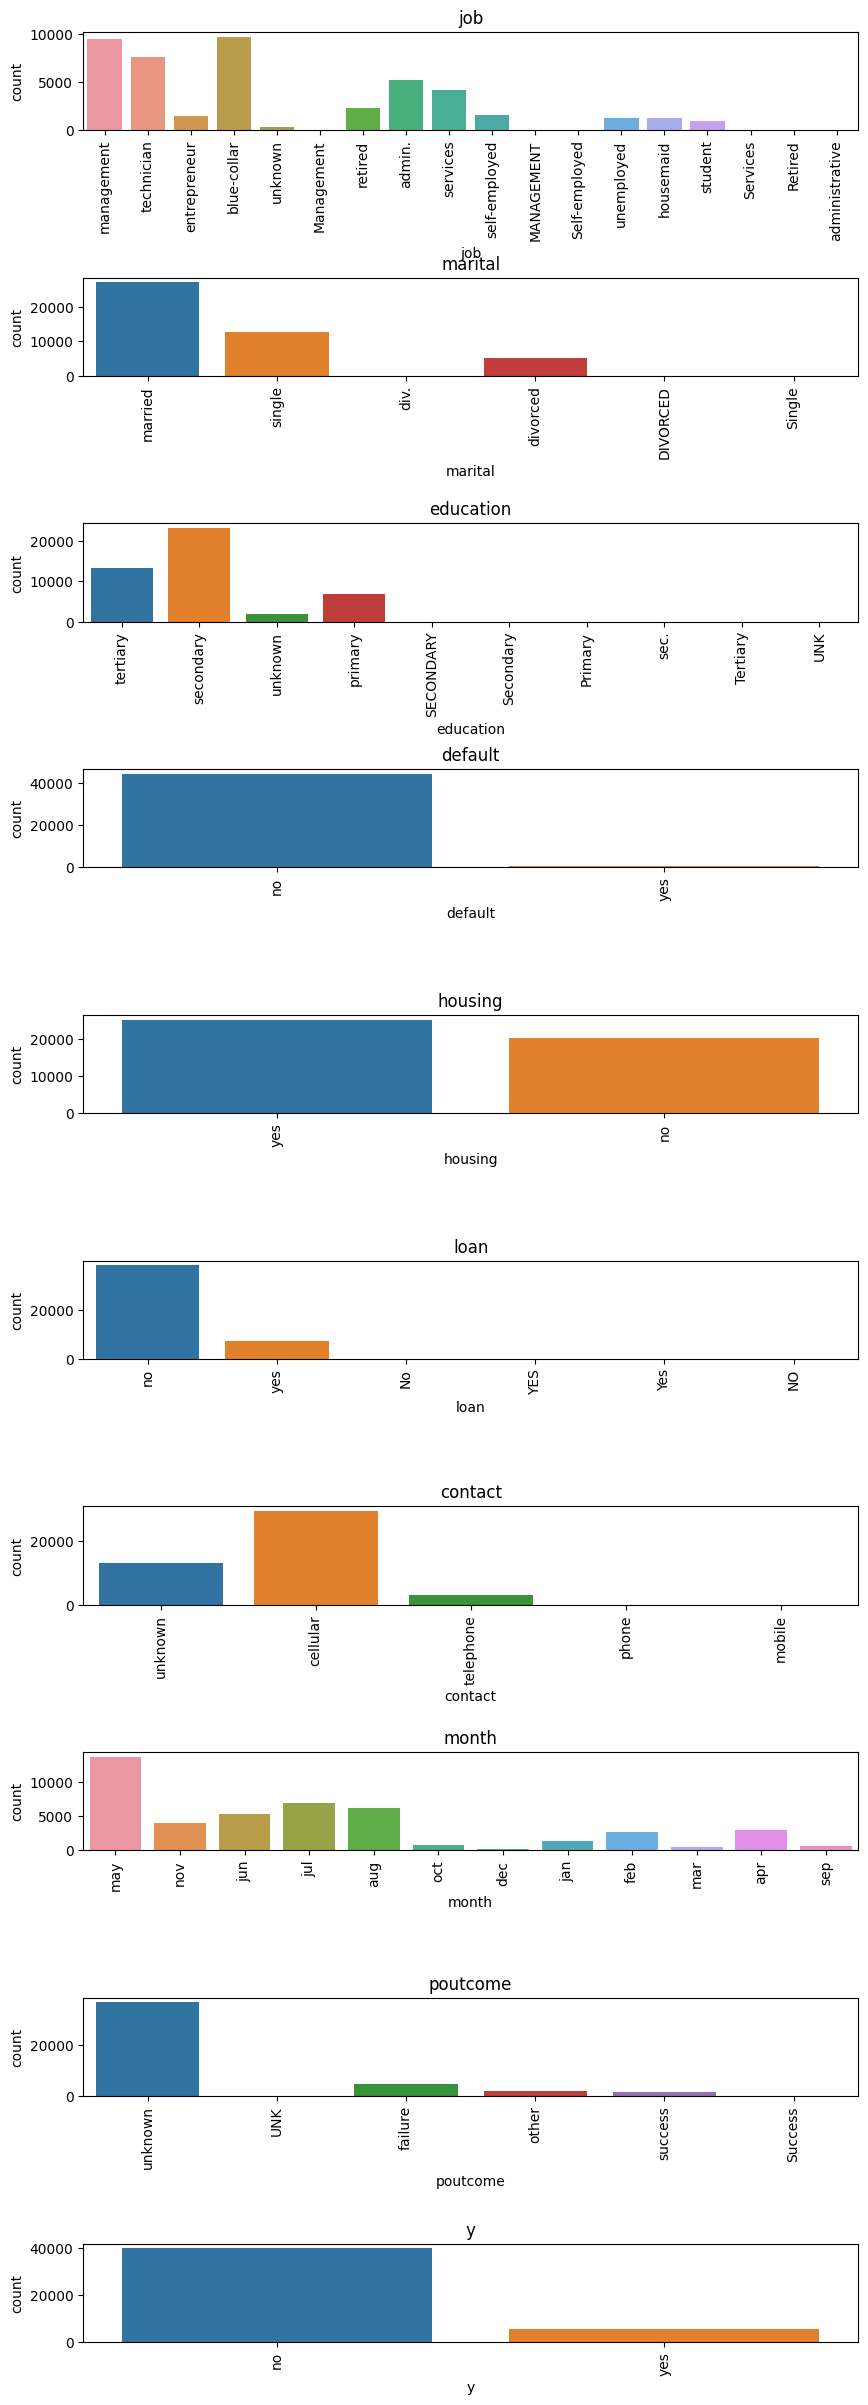

In [16]:
# Graficar los subniveles de cada variable categorica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.5) # Espaciado vertical entre gráficas
for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

In [17]:
# Convertimos toda las columnas categóricas a minusculas 
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']
for column in df.columns:
    if column in cols_cat:
        df[column]=df[column].str.lower()


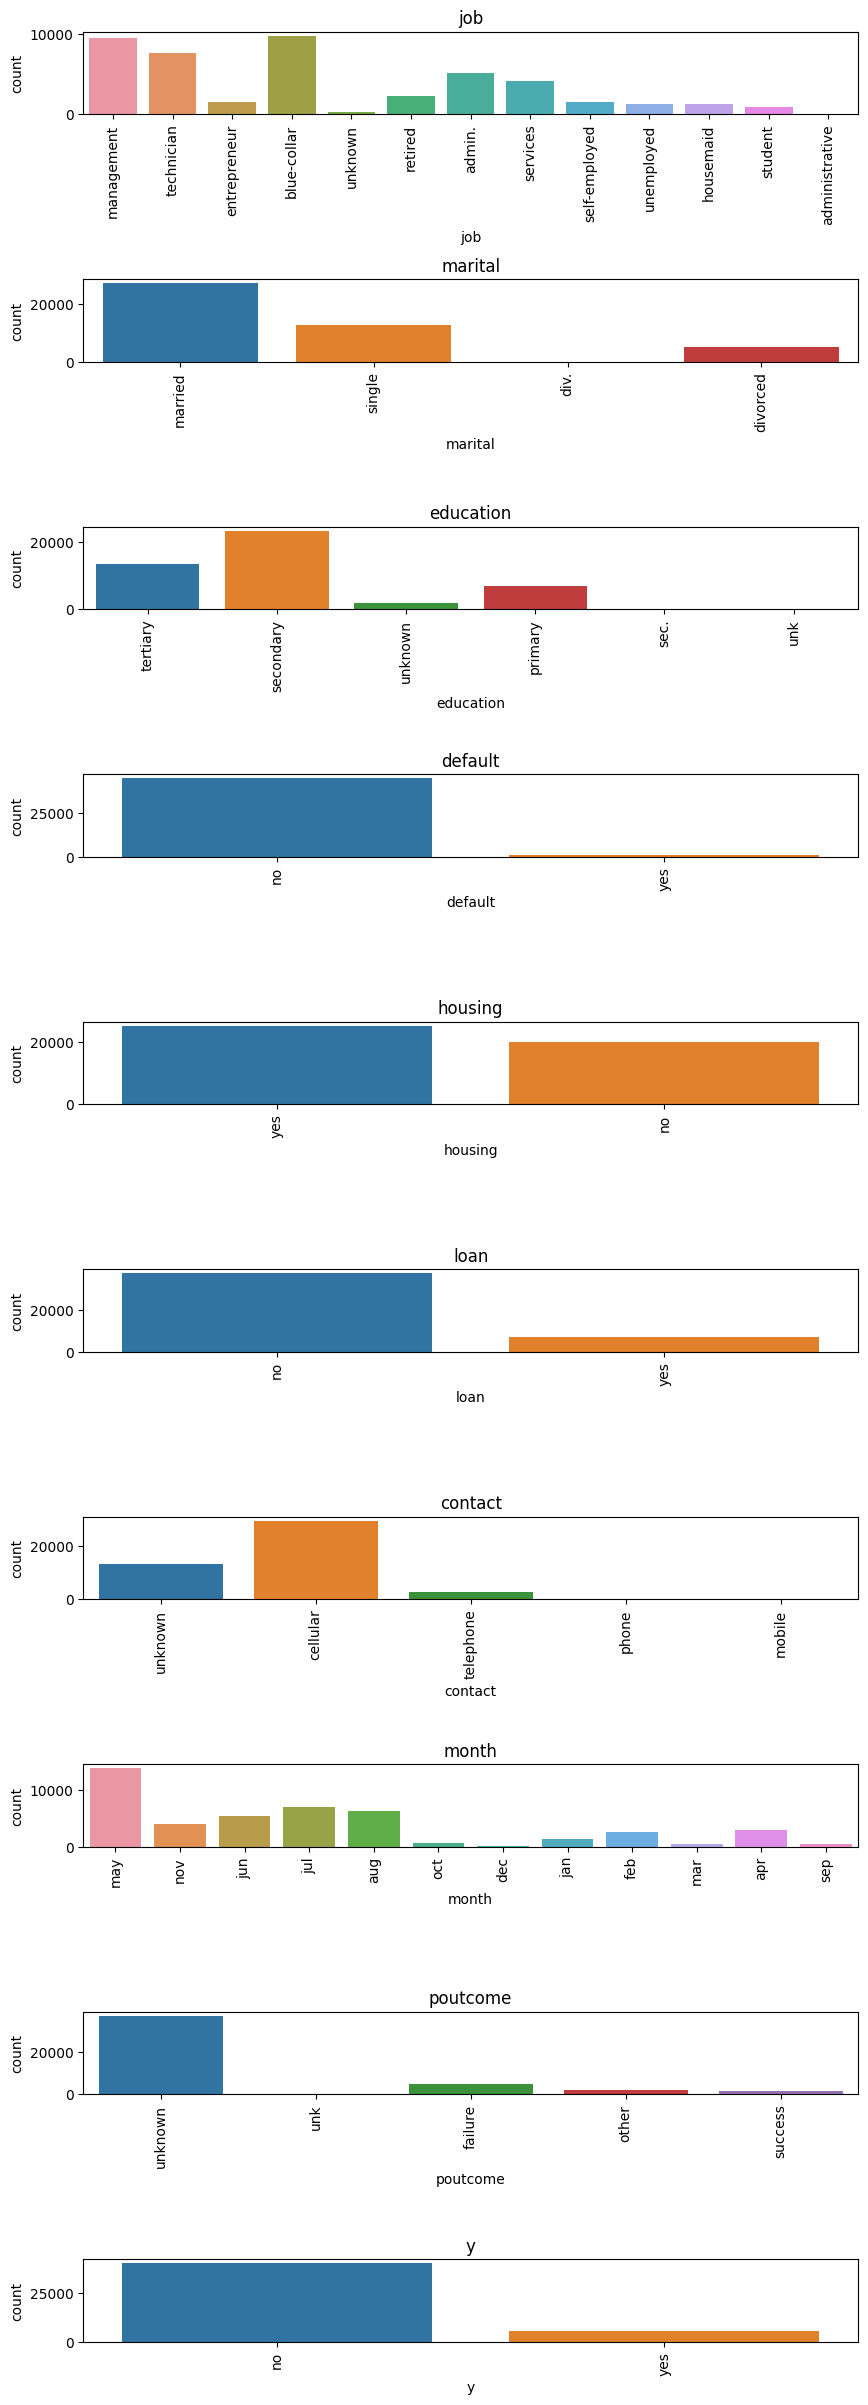

In [18]:
# Generamos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

In [19]:
# Columna 'job': Unificar admin. y administrative
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']


In [20]:
df['job']=df['job'].str.replace('admin.', 'administrative', regex=False)
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [21]:
# Columna 'marital'': Unificar 'div.' y 'divorced'
print(df['marital'].unique())

['married' 'single' 'div.' 'divorced']


In [22]:
df['marital']=df['marital'].str.replace('div.', 'divorced', regex=False)
print(df['marital'].unique())

['married' 'single' 'divorced']


In [23]:
 # Columna 'education': Unificar admin. y administrative
print(df['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']


In [24]:
df['education']=df['education'].str.replace('sec.', 'secondary', regex=False)
print(df['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'unk']


In [25]:
df.loc[df['education']=='unk','education'] = 'unknown'
print(df['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [26]:
 # Columna 'contact': Unificar telephone y phone
print(df['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']


In [27]:
df.loc[df['contact']=='phone','contact'] = 'telephone'
df.loc[df['contact']=='mobile','contact'] = 'cellular'
print(df['contact'].unique())

['unknown' 'cellular' 'telephone']


In [28]:
 # Columna 'poutcome': Unificar 'unknown'e y 'unk'
print(df['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']


In [29]:
df.loc[df['poutcome']=='unk','poutcome']='unknown'
print(df['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [30]:
df.shape

(45189, 17)

In [31]:
df.to_csv("dataset_banco_cleaned.csv", index=True)